<a href="https://colab.research.google.com/github/CodesByNehaal/TASK2_REDx/blob/main/Rice_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('/content/riceClassification.csv')

In [ ]:
df

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1.0
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1.0
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1.0
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1.0
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9444,9445,8575,150.524862,73.795110,0.871581,8811,104.489373,0.589266,367.820,0.796477,2.039767,0.0
9445,9446,7155,137.095050,67.207698,0.871595,7272,95.446472,0.608833,331.465,0.818360,2.039871,0.0
9446,9447,8828,151.953486,74.488049,0.871608,9111,106.019615,0.641523,377.486,0.778521,2.039971,0.0
9447,9448,8619,151.194363,74.115638,0.871609,8866,104.757108,0.718250,369.710,0.792400,2.039979,0.0


In [ ]:
df.dropna(inplace=True)

In [ ]:
print('Total number of 0(False count) are',(df['Class']==0).sum())
print('Total number of 1(True count) are',(df['Class']==1).sum())

Total number of 0(False count) are 648
Total number of 1(True count) are 8800


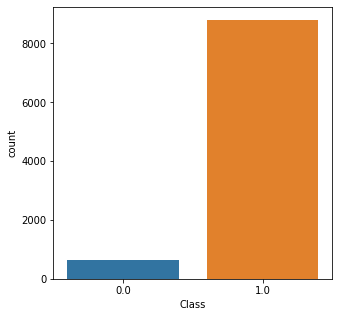

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='Class',data=df)
plt.show()

In [ ]:
#the dataset is quite balanced. 

df.drop(columns=['id'],inplace=True)
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1.0
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1.0
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1.0
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1.0
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9443,6846,133.866688,65.642431,0.871522,6997,93.362722,0.729851,330.005,0.789961,2.039332,0.0
9444,8575,150.524862,73.795110,0.871581,8811,104.489373,0.589266,367.820,0.796477,2.039767,0.0
9445,7155,137.095050,67.207698,0.871595,7272,95.446472,0.608833,331.465,0.818360,2.039871,0.0
9446,8828,151.953486,74.488049,0.871608,9111,106.019615,0.641523,377.486,0.778521,2.039971,0.0


In [ ]:
X = df.drop('Class', axis=1).values
y = df['Class'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Scikit-Learn modules
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report


In [ ]:
model = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2 )  
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.81      0.89       137
         1.0       0.99      1.00      0.99      1753

    accuracy                           0.99      1890
   macro avg       0.99      0.90      0.94      1890
weighted avg       0.99      0.99      0.99      1890



In [ ]:
model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.77      0.87       137
         1.0       0.98      1.00      0.99      1753

    accuracy                           0.98      1890
   macro avg       0.99      0.89      0.93      1890
weighted avg       0.98      0.98      0.98      1890

